In [1]:
import pandas as pd
import numpy
import random
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import models
from keras import layers
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from keras.preprocessing.text import Tokenizer

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
df = pd.read_csv('Data/tweet_product_company.csv',  encoding = 'unicode_escape')
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [3]:
data = df[['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product']]
data = data.rename(columns = {'tweet_text' : 'text', 'is_there_an_emotion_directed_at_a_brand_or_product' : 'category'})
data['category'] = data['category'].replace("[',]", "", regex=True)
data['category'].replace('No emotion toward brand or product', 'Neutral emotion', inplace=True)
data['category'].replace('I cant tell', 'Neutral emotion', inplace=True)
data.head()

,text,category
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Positive emotion


In [4]:
data.dropna(inplace=True)
data['text'] = data['text'].str.replace('@[A-Za-z0-9_]+', '', regex=True)
data['text'] = data['text'].str.replace('#[A-Za-z0-9_]+', '', regex=True)

In [5]:
y = data['category']
X = data['text']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

In [7]:
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts(X_train_final)
X_train_tokens = tokenizer.texts_to_matrix(X_train_final, mode='binary')
X_val_tokens = tokenizer.texts_to_matrix(X_val, mode='binary')
X_test_tokens = tokenizer.texts_to_matrix(X_test, mode='binary')

In [8]:
lb = LabelBinarizer()
lb.fit(y_train_final)
y_train_lb = to_categorical(lb.transform(y_train_final), num_classes=3)[:, :, 1]
y_val_lb = to_categorical(lb.transform(y_val), num_classes=3)[:, :, 1]
y_test_lb = to_categorical(lb.transform(y_test), num_classes=3)[:, :, 1]

In [9]:
from sklearn.utils import compute_class_weight
import numpy as np
class_weights = compute_class_weight(class_weight = "balanced",
                                     classes = np.unique(y_train_final),
                                     y = y_train_final)
class_weights = dict(zip(np.unique(y_train_final), class_weights))
class_weights

{'Negative emotion': 5.560652395514781,
 'Neutral emotion': 0.5382869548056048,
 'Positive emotion': 1.039047619047619}

In [61]:
random.seed(123)
baseline_model = models.Sequential()
baseline_model.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
baseline_model.add(layers.Dense(25, activation='relu'))
baseline_model.add(layers.Dense(3, activation='softmax'))

In [62]:
import keras
baseline_model.compile(optimizer='SGD',
                       loss='categorical_crossentropy',
                       metrics=['accuracy', keras.metrics.Precision(name='precision', class_id=0)])

In [63]:
weights = {0: 5.56065, 1: 0.53828, 2: 1.03904}
baseline_model_val = baseline_model.fit(X_train_tokens,
                                        y_train_lb,
                                        class_weight=weights,
                                        epochs=250,
                                        batch_size=256,
                                        validation_data=(X_val_tokens, y_val_lb))

Epoch 1/250
 5/22 [=====>........................] - ETA: 0s - loss: 1.1071 - accuracy: 0.5625 - precision: 0.0000e+00

2023-03-02 11:42:28.683130: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 23ms/step - loss: 1.1024 - accuracy: 0.5639 - precision: 0.0000e+00 - val_loss: 1.0626 - val_accuracy: 0.5506 - val_precision: 0.0000e+00
Epoch 2/250
 6/22 [=======>......................] - ETA: 0s - loss: 1.0763 - accuracy: 0.5638 - precision: 0.0000e+00

2023-03-02 11:42:29.143705: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 12ms/step - loss: 1.0998 - accuracy: 0.5505 - precision: 0.0000e+00 - val_loss: 1.0666 - val_accuracy: 0.5271 - val_precision: 0.0000e+00
Epoch 3/250
22/22 [==============================] - 0s 11ms/step - loss: 1.0975 - accuracy: 0.5357 - precision: 0.0000e+00 - val_loss: 1.0695 - val_accuracy: 0.5110 - val_precision: 0.0000e+00
Epoch 4/250
22/22 [==============================] - 0s 11ms/step - loss: 1.0956 - accuracy: 0.5289 - precision: 0.0000e+00 - val_loss: 1.0716 - val_accuracy: 0.5015 - val_precision: 0.0000e+00
Epoch 5/250
22/22 [==============================] - 0s 11ms/step - loss: 1.0937 - accuracy: 0.5133 - precision: 0.0000e+00 - val_loss: 1.0731 - val_accuracy: 0.4905 - val_precision: 0.0000e+00
Epoch 6/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0919 - accuracy: 0.4995 - precision: 0.0000e+00 - val_loss: 1.0752 - val_accuracy: 0.4802 - val_precision: 0.0000e+00
Epoch 7/250
22/22 [=======================

22/22 [==============================] - 0s 11ms/step - loss: 0.9723 - accuracy: 0.4913 - precision: 0.4273 - val_loss: 0.9912 - val_accuracy: 0.4619 - val_precision: 0.1579
Epoch 45/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9688 - accuracy: 0.4911 - precision: 0.4275 - val_loss: 0.9898 - val_accuracy: 0.4604 - val_precision: 0.1739
Epoch 46/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9654 - accuracy: 0.4937 - precision: 0.4228 - val_loss: 0.9907 - val_accuracy: 0.4604 - val_precision: 0.1667
Epoch 47/250
22/22 [==============================] - 0s 10ms/step - loss: 0.9619 - accuracy: 0.4918 - precision: 0.3966 - val_loss: 0.9901 - val_accuracy: 0.4597 - val_precision: 0.2500
Epoch 48/250
22/22 [==============================] - 0s 10ms/step - loss: 0.9584 - accuracy: 0.4920 - precision: 0.3930 - val_loss: 0.9891 - val_accuracy: 0.4619 - val_precision: 0.2353
Epoch 49/250
22/22 [==============================] - 0s 10ms/step - loss: 0.9

Epoch 88/250
22/22 [==============================] - 0s 10ms/step - loss: 0.8220 - accuracy: 0.5677 - precision: 0.3679 - val_loss: 0.9340 - val_accuracy: 0.5117 - val_precision: 0.2922
Epoch 89/250
22/22 [==============================] - 0s 10ms/step - loss: 0.8186 - accuracy: 0.5670 - precision: 0.3648 - val_loss: 0.9320 - val_accuracy: 0.5110 - val_precision: 0.2876
Epoch 90/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8153 - accuracy: 0.5668 - precision: 0.3620 - val_loss: 0.9260 - val_accuracy: 0.5198 - val_precision: 0.2905
Epoch 91/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8119 - accuracy: 0.5718 - precision: 0.3690 - val_loss: 0.9280 - val_accuracy: 0.5176 - val_precision: 0.2857
Epoch 92/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8083 - accuracy: 0.5698 - precision: 0.3635 - val_loss: 0.9310 - val_accuracy: 0.5176 - val_precision: 0.2778
Epoch 93/250
22/22 [==============================] - 0s 10ms/ste

Epoch 132/250
22/22 [==============================] - 0s 10ms/step - loss: 0.6723 - accuracy: 0.6308 - precision: 0.4814 - val_loss: 0.8732 - val_accuracy: 0.5543 - val_precision: 0.3212
Epoch 133/250
22/22 [==============================] - 0s 10ms/step - loss: 0.6691 - accuracy: 0.6321 - precision: 0.4790 - val_loss: 0.8777 - val_accuracy: 0.5535 - val_precision: 0.3143
Epoch 134/250
22/22 [==============================] - 0s 10ms/step - loss: 0.6656 - accuracy: 0.6323 - precision: 0.4776 - val_loss: 0.8745 - val_accuracy: 0.5557 - val_precision: 0.3143
Epoch 135/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6625 - accuracy: 0.6341 - precision: 0.4907 - val_loss: 0.8839 - val_accuracy: 0.5513 - val_precision: 0.2993
Epoch 136/250
22/22 [==============================] - 0s 10ms/step - loss: 0.6595 - accuracy: 0.6330 - precision: 0.4802 - val_loss: 0.8639 - val_accuracy: 0.5645 - val_precision: 0.3209
Epoch 137/250
22/22 [==============================] - 0s 10

22/22 [==============================] - 0s 11ms/step - loss: 0.5494 - accuracy: 0.6786 - precision: 0.6218 - val_loss: 0.8466 - val_accuracy: 0.5880 - val_precision: 0.3101
Epoch 176/250
22/22 [==============================] - 0s 10ms/step - loss: 0.5468 - accuracy: 0.6748 - precision: 0.6081 - val_loss: 0.8317 - val_accuracy: 0.5916 - val_precision: 0.3220
Epoch 177/250
22/22 [==============================] - 0s 10ms/step - loss: 0.5445 - accuracy: 0.6825 - precision: 0.6077 - val_loss: 0.8332 - val_accuracy: 0.5916 - val_precision: 0.3193
Epoch 178/250
22/22 [==============================] - 0s 10ms/step - loss: 0.5422 - accuracy: 0.6819 - precision: 0.6206 - val_loss: 0.8328 - val_accuracy: 0.5924 - val_precision: 0.3193
Epoch 179/250
22/22 [==============================] - 0s 10ms/step - loss: 0.5399 - accuracy: 0.6860 - precision: 0.6193 - val_loss: 0.8339 - val_accuracy: 0.5938 - val_precision: 0.3193
Epoch 180/250
22/22 [==============================] - 0s 11ms/step - loss

Epoch 219/250
22/22 [==============================] - 0s 10ms/step - loss: 0.4616 - accuracy: 0.7250 - precision: 0.7168 - val_loss: 0.8247 - val_accuracy: 0.6085 - val_precision: 0.3333
Epoch 220/250
22/22 [==============================] - 0s 10ms/step - loss: 0.4600 - accuracy: 0.7276 - precision: 0.7162 - val_loss: 0.8240 - val_accuracy: 0.6100 - val_precision: 0.3393
Epoch 221/250
22/22 [==============================] - 0s 14ms/step - loss: 0.4583 - accuracy: 0.7283 - precision: 0.7152 - val_loss: 0.8267 - val_accuracy: 0.6085 - val_precision: 0.3486
Epoch 222/250
22/22 [==============================] - 0s 11ms/step - loss: 0.4569 - accuracy: 0.7267 - precision: 0.7152 - val_loss: 0.8254 - val_accuracy: 0.6085 - val_precision: 0.3391
Epoch 223/250
22/22 [==============================] - 0s 11ms/step - loss: 0.4554 - accuracy: 0.7292 - precision: 0.7200 - val_loss: 0.8202 - val_accuracy: 0.6107 - val_precision: 0.3725
Epoch 224/250
22/22 [==============================] - 0s 11

In [64]:
baseline_model_val_dict = baseline_model_val.history
baseline_model_val_dict.keys()

dict_keys(['loss', 'accuracy', 'precision', 'val_loss', 'val_accuracy', 'val_precision'])

In [65]:
results_train = baseline_model.evaluate(X_train_tokens, y_train_lb)
print('-------------')
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3} \nTraining Precision: {results_train[2]:.3}')

171/171 [==============================] - 1s 7ms/step - loss: 0.5499 - accuracy: 0.7490 - precision: 0.7946
-------------
Training Loss: 0.55 
Training Accuracy: 0.749 
Training Precision: 0.795


In [66]:
results_test = baseline_model.evaluate(X_test_tokens, y_test_lb)
print('-------------')
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3} \nTest Precision: {results_train[2]:.3}')

72/72 [==============================] - 1s 7ms/step - loss: 0.8083 - accuracy: 0.6172 - precision: 0.3947
-------------
Test Loss: 0.808 
Test Accuracy: 0.617 
Test Precision: 0.795


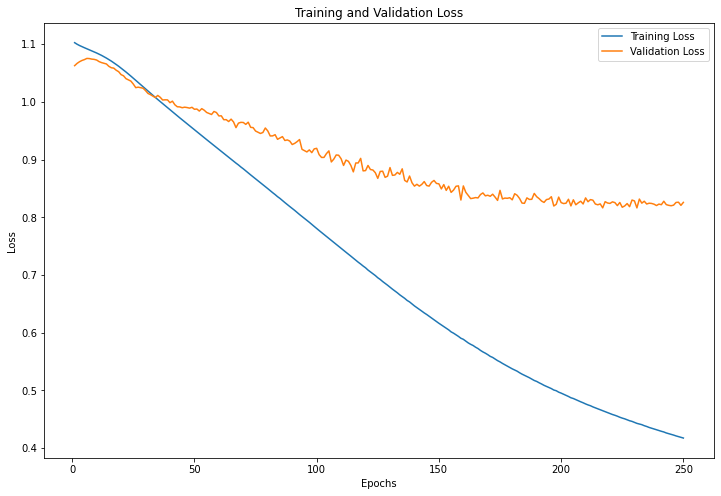

In [67]:
fig, ax = plt.subplots(figsize=(12, 8))
baseline_model_val_dict = baseline_model_val.history
loss_values = baseline_model_val_dict['loss']
val_loss_values = baseline_model_val_dict['val_loss']
epochs = range(1, len(loss_values)+1)
ax.plot(epochs, loss_values, label='Training Loss')
ax.plot(epochs, val_loss_values, label='Validation Loss')
ax.set_title('Training and Validation Loss')
ax.set_xlabel('Epochs')
ax.set_ylabel('Loss')
ax.legend();

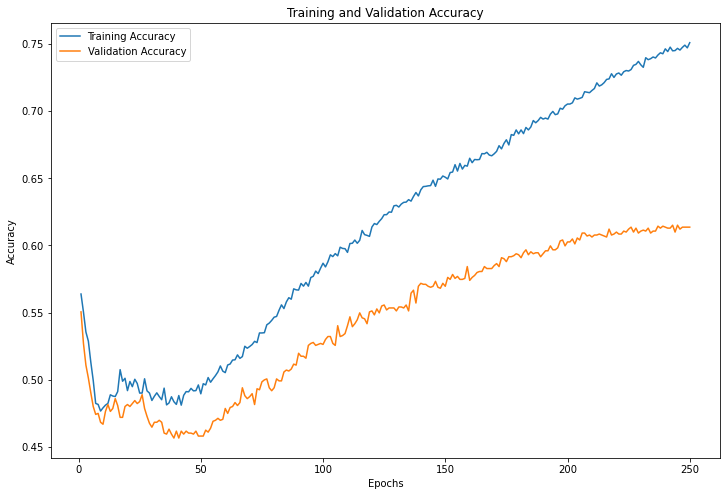

In [68]:
fig, ax = plt.subplots(figsize=(12, 8))
acc_values = baseline_model_val_dict['accuracy']
val_acc_values = baseline_model_val_dict['val_accuracy']
ax.plot(epochs, acc_values, label='Training Accuracy')
ax.plot(epochs, val_acc_values, label='Validation Accuracy')
ax.set_title('Training and Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

There is an interesting pattern here. Although the training sccuracy keeps increasing when going through more epochs, and the training loss kepps decreasing, the validation accuracy and loss don't necessarily do teh same. After a certain point, validation accuracy keeps swinging, which means that the model is probably overfit.

In [69]:
random.seed(123)
model_2 = models.Sequential()
model_2.add(layers.Dense(50, activation='relu', input_shape=(2000,)))
model_2.add(layers.Dense(25, activation='relu'))
model_2.add(layers.Dense(3, activation='softmax'))

model_2.compile(optimizer='SGD',
                loss='categorical_crossentropy',
                metrics=['accuracy', keras.metrics.Precision(name='precision', class_id=0)])

In [70]:
# patience: Number of epochs with no improvement after which training will be stopped.
from keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = [EarlyStopping(monitor='val_loss', patience=15),
                  ModelCheckpoint(filepath='best_model.h5',
                                  monitor='val_loss',
                                  save_best_only=True)]

In [71]:
model_2_val = model_2.fit(X_train_tokens,
                          y_train_lb,
                          class_weight=weights,
                          epochs=250,
                          callbacks=early_stopping,              
                          batch_size=256,
                          validation_data=(X_val_tokens, y_val_lb))

Epoch 1/250
 6/22 [=======>......................] - ETA: 0s - loss: 1.1238 - accuracy: 0.5664 - precision: 0.0000e+00

2023-03-02 11:44:45.594576: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 25ms/step - loss: 1.1024 - accuracy: 0.5661 - precision: 0.0000e+00 - val_loss: 1.0647 - val_accuracy: 0.5455 - val_precision: 0.0000e+00
Epoch 2/250
 1/22 [>.............................] - ETA: 0s - loss: 1.0393 - accuracy: 0.5430 - precision: 0.0000e+00

2023-03-02 11:44:46.105434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 12ms/step - loss: 1.0995 - accuracy: 0.5434 - precision: 0.0000e+00 - val_loss: 1.0685 - val_accuracy: 0.5176 - val_precision: 0.0000e+00
Epoch 3/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0974 - accuracy: 0.5320 - precision: 0.0000e+00 - val_loss: 1.0713 - val_accuracy: 0.5066 - val_precision: 0.0000e+00
Epoch 4/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0955 - accuracy: 0.5115 - precision: 0.0000e+00 - val_loss: 1.0731 - val_accuracy: 0.4919 - val_precision: 0.0000e+00
Epoch 5/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0937 - accuracy: 0.5039 - precision: 0.0000e+00 - val_loss: 1.0756 - val_accuracy: 0.4780 - val_precision: 0.0000e+00
Epoch 6/250
22/22 [==============================] - 0s 11ms/step - loss: 1.0918 - accuracy: 0.4884 - precision: 0.0000e+00 - val_loss: 1.0759 - val_accuracy: 0.4751 - val_precision: 0.0000e+00
Epoch 7/250
22/22 [=======================

22/22 [==============================] - 0s 12ms/step - loss: 0.9733 - accuracy: 0.4895 - precision: 0.4234 - val_loss: 0.9930 - val_accuracy: 0.4619 - val_precision: 0.1667
Epoch 45/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9698 - accuracy: 0.4939 - precision: 0.4237 - val_loss: 0.9932 - val_accuracy: 0.4604 - val_precision: 0.1739
Epoch 46/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9664 - accuracy: 0.4951 - precision: 0.4056 - val_loss: 0.9948 - val_accuracy: 0.4597 - val_precision: 0.1935
Epoch 47/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9629 - accuracy: 0.4896 - precision: 0.3943 - val_loss: 0.9932 - val_accuracy: 0.4589 - val_precision: 0.2368
Epoch 48/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9594 - accuracy: 0.4895 - precision: 0.3951 - val_loss: 0.9857 - val_accuracy: 0.4641 - val_precision: 0.2632
Epoch 49/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9

Epoch 88/250
22/22 [==============================] - 0s 12ms/step - loss: 0.8229 - accuracy: 0.5617 - precision: 0.3565 - val_loss: 0.9331 - val_accuracy: 0.5132 - val_precision: 0.2914
Epoch 89/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8196 - accuracy: 0.5679 - precision: 0.3619 - val_loss: 0.9349 - val_accuracy: 0.5125 - val_precision: 0.2876
Epoch 90/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8161 - accuracy: 0.5672 - precision: 0.3682 - val_loss: 0.9323 - val_accuracy: 0.5125 - val_precision: 0.2876
Epoch 91/250
22/22 [==============================] - 0s 12ms/step - loss: 0.8128 - accuracy: 0.5657 - precision: 0.3618 - val_loss: 0.9213 - val_accuracy: 0.5191 - val_precision: 0.2966
Epoch 92/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8096 - accuracy: 0.5731 - precision: 0.3693 - val_loss: 0.9234 - val_accuracy: 0.5213 - val_precision: 0.2945
Epoch 93/250
22/22 [==============================] - 0s 11ms/ste

Epoch 132/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6732 - accuracy: 0.6297 - precision: 0.4751 - val_loss: 0.8728 - val_accuracy: 0.5557 - val_precision: 0.3212
Epoch 133/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6700 - accuracy: 0.6319 - precision: 0.4815 - val_loss: 0.8741 - val_accuracy: 0.5550 - val_precision: 0.3165
Epoch 134/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6671 - accuracy: 0.6319 - precision: 0.4816 - val_loss: 0.8649 - val_accuracy: 0.5601 - val_precision: 0.3284
Epoch 135/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6639 - accuracy: 0.6387 - precision: 0.4890 - val_loss: 0.8635 - val_accuracy: 0.5609 - val_precision: 0.3259
Epoch 136/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6607 - accuracy: 0.6357 - precision: 0.4882 - val_loss: 0.8542 - val_accuracy: 0.5711 - val_precision: 0.3279
Epoch 137/250
22/22 [==============================] - 0s 11

22/22 [==============================] - 0s 11ms/step - loss: 0.5499 - accuracy: 0.6741 - precision: 0.6085 - val_loss: 0.8386 - val_accuracy: 0.5865 - val_precision: 0.3223
Epoch 176/250
22/22 [==============================] - 0s 11ms/step - loss: 0.5474 - accuracy: 0.6812 - precision: 0.6038 - val_loss: 0.8350 - val_accuracy: 0.5902 - val_precision: 0.3220
Epoch 177/250
22/22 [==============================] - 0s 11ms/step - loss: 0.5451 - accuracy: 0.6814 - precision: 0.6157 - val_loss: 0.8315 - val_accuracy: 0.5924 - val_precision: 0.3220
Epoch 178/250
22/22 [==============================] - 0s 11ms/step - loss: 0.5426 - accuracy: 0.6816 - precision: 0.6133 - val_loss: 0.8350 - val_accuracy: 0.5924 - val_precision: 0.3167
Epoch 179/250
22/22 [==============================] - 0s 12ms/step - loss: 0.5402 - accuracy: 0.6851 - precision: 0.6117 - val_loss: 0.8402 - val_accuracy: 0.5909 - val_precision: 0.3175
Epoch 180/250
22/22 [==============================] - 0s 11ms/step - loss

In [72]:
from keras.models import load_model
saved_model = load_model('best_model.h5')

In [73]:
results_train = saved_model.evaluate(X_train_tokens, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3} \nTraining Precision: {results_train[2]:.3}')
print('-------------')
results_test = saved_model.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3} \nTest Precision: {results_train[2]:.3}')

  7/171 [>.............................] - ETA: 1s - loss: 0.6326 - accuracy: 0.6875 - precision: 0.7826 

2023-03-02 11:45:47.456342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


171/171 [==============================] - 1s 7ms/step - loss: 0.6271 - accuracy: 0.7091 - precision: 0.6898
Training Loss: 0.627 
Training Accuracy: 0.709 
Training Precision: 0.69
-------------
72/72 [==============================] - 1s 7ms/step - loss: 0.8128 - accuracy: 0.5979 - precision: 0.3457
Test Loss: 0.813 
Test Accuracy: 0.598 
Test Precision: 0.69


In [74]:
from keras import regularizers
random.seed(123)
L2_model = models.Sequential()
L2_model.add(layers.Dense(50, 
                          activation='relu', 
                          kernel_regularizer=regularizers.l2(0.005),
                          input_shape=(2000,)))
L2_model.add(layers.Dense(25,
                          kernel_regularizer=regularizers.l2(0.005),
                          activation='relu'))
L2_model.add(layers.Dense(3, activation='softmax'))

L2_model.compile(optimizer='SGD',
                 loss='categorical_crossentropy',
                 metrics=['accuracy', keras.metrics.Precision(name='precision', class_id=0)])

In [75]:
L2_model_val = L2_model.fit(X_train_tokens,
                            y_train_lb,
                            class_weight=weights,
                            epochs=250,        
                            batch_size=256,
                            validation_data=(X_val_tokens, y_val_lb))

Epoch 1/250
 1/22 [>.............................] - ETA: 8s - loss: 1.6047 - accuracy: 0.5508 - precision: 0.0000e+00

2023-03-02 11:46:20.968375: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 27ms/step - loss: 1.7536 - accuracy: 0.5621 - precision: 0.0000e+00 - val_loss: 1.7119 - val_accuracy: 0.5528 - val_precision: 0.0000e+00
Epoch 2/250
 1/22 [>.............................] - ETA: 0s - loss: 1.7230 - accuracy: 0.5820 - precision: 0.0000e+00

2023-03-02 11:46:21.535078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 13ms/step - loss: 1.7481 - accuracy: 0.5476 - precision: 0.0000e+00 - val_loss: 1.7130 - val_accuracy: 0.5315 - val_precision: 0.0000e+00
Epoch 3/250
22/22 [==============================] - 0s 12ms/step - loss: 1.7431 - accuracy: 0.5410 - precision: 0.0000e+00 - val_loss: 1.7143 - val_accuracy: 0.5088 - val_precision: 0.0000e+00
Epoch 4/250
22/22 [==============================] - 0s 11ms/step - loss: 1.7383 - accuracy: 0.5226 - precision: 0.0000e+00 - val_loss: 1.7143 - val_accuracy: 0.4956 - val_precision: 0.0000e+00
Epoch 5/250
22/22 [==============================] - 0s 12ms/step - loss: 1.7336 - accuracy: 0.5012 - precision: 0.0000e+00 - val_loss: 1.7127 - val_accuracy: 0.4883 - val_precision: 0.0000e+00
Epoch 6/250
22/22 [==============================] - 0s 12ms/step - loss: 1.7292 - accuracy: 0.4955 - precision: 0.0000e+00 - val_loss: 1.7111 - val_accuracy: 0.4802 - val_precision: 0.0000e+00
Epoch 7/250
22/22 [=======================

22/22 [==============================] - 0s 12ms/step - loss: 1.5259 - accuracy: 0.4891 - precision: 0.5385 - val_loss: 1.5407 - val_accuracy: 0.4545 - val_precision: 0.2000
Epoch 45/250
22/22 [==============================] - 0s 11ms/step - loss: 1.5206 - accuracy: 0.4900 - precision: 0.4638 - val_loss: 1.5403 - val_accuracy: 0.4553 - val_precision: 0.2500
Epoch 46/250
22/22 [==============================] - 0s 11ms/step - loss: 1.5154 - accuracy: 0.4876 - precision: 0.4396 - val_loss: 1.5398 - val_accuracy: 0.4501 - val_precision: 0.1765
Epoch 47/250
22/22 [==============================] - 0s 11ms/step - loss: 1.5101 - accuracy: 0.4878 - precision: 0.4414 - val_loss: 1.5368 - val_accuracy: 0.4516 - val_precision: 0.1905
Epoch 48/250
22/22 [==============================] - 0s 11ms/step - loss: 1.5049 - accuracy: 0.4895 - precision: 0.4351 - val_loss: 1.5327 - val_accuracy: 0.4523 - val_precision: 0.1786
Epoch 49/250
22/22 [==============================] - 0s 11ms/step - loss: 1.4

Epoch 88/250
22/22 [==============================] - 0s 11ms/step - loss: 1.3120 - accuracy: 0.5540 - precision: 0.3591 - val_loss: 1.4081 - val_accuracy: 0.5051 - val_precision: 0.2980
Epoch 89/250
22/22 [==============================] - 0s 11ms/step - loss: 1.3074 - accuracy: 0.5534 - precision: 0.3564 - val_loss: 1.4155 - val_accuracy: 0.5022 - val_precision: 0.2690
Epoch 90/250
22/22 [==============================] - 0s 11ms/step - loss: 1.3030 - accuracy: 0.5490 - precision: 0.3469 - val_loss: 1.3990 - val_accuracy: 0.5103 - val_precision: 0.2993
Epoch 91/250
22/22 [==============================] - 0s 12ms/step - loss: 1.2983 - accuracy: 0.5538 - precision: 0.3558 - val_loss: 1.3915 - val_accuracy: 0.5161 - val_precision: 0.3121
Epoch 92/250
22/22 [==============================] - 0s 11ms/step - loss: 1.2940 - accuracy: 0.5586 - precision: 0.3650 - val_loss: 1.3873 - val_accuracy: 0.5176 - val_precision: 0.3121
Epoch 93/250
22/22 [==============================] - 0s 12ms/ste

Epoch 132/250
22/22 [==============================] - 0s 12ms/step - loss: 1.1234 - accuracy: 0.6121 - precision: 0.4484 - val_loss: 1.2898 - val_accuracy: 0.5455 - val_precision: 0.3165
Epoch 133/250
22/22 [==============================] - 0s 12ms/step - loss: 1.1192 - accuracy: 0.6123 - precision: 0.4489 - val_loss: 1.2870 - val_accuracy: 0.5469 - val_precision: 0.3188
Epoch 134/250
22/22 [==============================] - 0s 12ms/step - loss: 1.1153 - accuracy: 0.6136 - precision: 0.4544 - val_loss: 1.2957 - val_accuracy: 0.5440 - val_precision: 0.2953
Epoch 135/250
22/22 [==============================] - 0s 12ms/step - loss: 1.1116 - accuracy: 0.6176 - precision: 0.4502 - val_loss: 1.3112 - val_accuracy: 0.5440 - val_precision: 0.2788
Epoch 136/250
22/22 [==============================] - 0s 11ms/step - loss: 1.1079 - accuracy: 0.6134 - precision: 0.4434 - val_loss: 1.2719 - val_accuracy: 0.5543 - val_precision: 0.3359
Epoch 137/250
22/22 [==============================] - 0s 12

22/22 [==============================] - 0s 11ms/step - loss: 0.9704 - accuracy: 0.6623 - precision: 0.5619 - val_loss: 1.2103 - val_accuracy: 0.5806 - val_precision: 0.3223
Epoch 176/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9673 - accuracy: 0.6561 - precision: 0.5683 - val_loss: 1.1997 - val_accuracy: 0.5814 - val_precision: 0.3248
Epoch 177/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9644 - accuracy: 0.6642 - precision: 0.5750 - val_loss: 1.2160 - val_accuracy: 0.5762 - val_precision: 0.3182
Epoch 178/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9613 - accuracy: 0.6610 - precision: 0.5720 - val_loss: 1.2005 - val_accuracy: 0.5836 - val_precision: 0.3276
Epoch 179/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9580 - accuracy: 0.6607 - precision: 0.5817 - val_loss: 1.1933 - val_accuracy: 0.5821 - val_precision: 0.3333
Epoch 180/250
22/22 [==============================] - 0s 11ms/step - loss

Epoch 219/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8525 - accuracy: 0.6970 - precision: 0.6723 - val_loss: 1.1458 - val_accuracy: 0.6034 - val_precision: 0.3491
Epoch 220/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8506 - accuracy: 0.6997 - precision: 0.6709 - val_loss: 1.1488 - val_accuracy: 0.5997 - val_precision: 0.3458
Epoch 221/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8478 - accuracy: 0.6968 - precision: 0.6702 - val_loss: 1.1502 - val_accuracy: 0.6019 - val_precision: 0.3419
Epoch 222/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8458 - accuracy: 0.7023 - precision: 0.6709 - val_loss: 1.1543 - val_accuracy: 0.5975 - val_precision: 0.3500
Epoch 223/250
22/22 [==============================] - 0s 12ms/step - loss: 0.8434 - accuracy: 0.6977 - precision: 0.6780 - val_loss: 1.1502 - val_accuracy: 0.5990 - val_precision: 0.3390
Epoch 224/250
22/22 [==============================] - 0s 11

In [76]:
results_train = L2_model.evaluate(X_train_tokens, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3} \nTraining Precision: {results_train[2]:.3}')
print('-------------')
results_test = L2_model.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3} \nTest Precision: {results_train[2]:.3}')

171/171 [==============================] - 1s 8ms/step - loss: 0.9130 - accuracy: 0.7243 - precision: 0.7547
Training Loss: 0.913 
Training Accuracy: 0.724 
Training Precision: 0.755
-------------
72/72 [==============================] - 1s 8ms/step - loss: 1.1032 - accuracy: 0.6076 - precision: 0.3742
Test Loss: 1.1 
Test Accuracy: 0.608 
Test Precision: 0.755


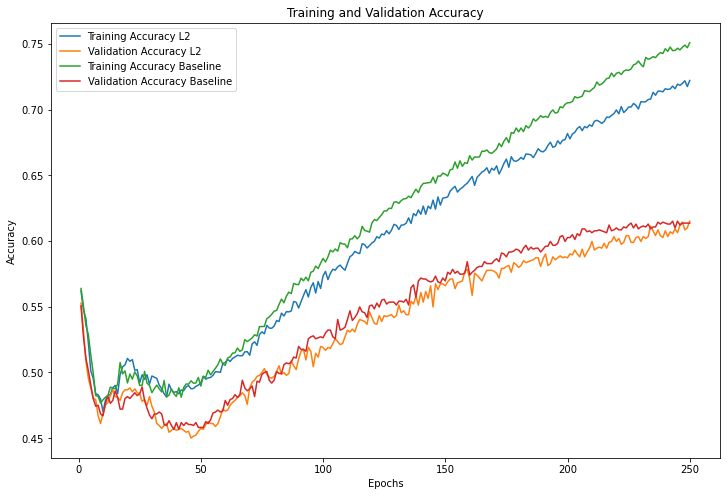

In [77]:
# look at the training and validation accuracy for baseline and l2 model
L2_model_dict = L2_model_val.history
L2_acc_values = L2_model_dict['accuracy']
L2_val_acc_values = L2_model_dict['val_accuracy']

baseline_model_acc = baseline_model_val_dict['accuracy']
baseline_model_val_acc = baseline_model_val_dict['val_accuracy']

fig, ax = plt.subplots(figsize=(12, 8))
epochs = range(1, len(acc_values)+1)
ax.plot(epochs, L2_acc_values, label='Training Accuracy L2')
ax.plot(epochs, L2_val_acc_values, label='Validation Accuracy L2')
ax.plot(epochs, baseline_model_acc, label='Training Accuracy Baseline')
ax.plot(epochs, baseline_model_val_acc, label='Validation Accuracy Baseline')
ax.set_title('Training and Validation Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.legend();

The results of L2 regularization are quite disappointing. The discrepancy between validation adn training accuracy seems to have decreased slightly, but the end result is definitely not getting better

In [78]:
random.seed(123)
dropout_model = models.Sequential()
dropout_model.add(layers.Dropout(0.3, input_shape=(2000,)))
dropout_model.add(layers.Dense(50, activation='relu'))
dropout_model.add(layers.Dense(25, activation='relu'))
dropout_model.add(layers.Dense(3, activation='softmax'))

In [79]:
dropout_model.compile(optimizer='SGD',
                      loss='categorical_crossentropy',
                      metrics=['accuracy', keras.metrics.Precision(name='precision', class_id=0)])
dropout_model_val = dropout_model.fit(X_train_tokens,
                                      y_train_lb,
                                      class_weight=weights,
                                      epochs=250,        
                                      batch_size=256,
                                      validation_data=(X_val_tokens, y_val_lb))

Epoch 1/250
 1/22 [>.............................] - ETA: 18s - loss: 1.0879 - accuracy: 0.5430 - precision: 0.0000e+00

2023-03-02 11:48:06.549463: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 1s 27ms/step - loss: 1.1054 - accuracy: 0.5628 - precision: 0.0000e+00 - val_loss: 1.0649 - val_accuracy: 0.5403 - val_precision: 0.0000e+00
Epoch 2/250
 1/22 [>.............................] - ETA: 0s - loss: 1.0874 - accuracy: 0.5156 - precision: 0.0000e+00

2023-03-02 11:48:07.102482: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


22/22 [==============================] - 0s 14ms/step - loss: 1.1014 - accuracy: 0.5472 - precision: 0.0000e+00 - val_loss: 1.0708 - val_accuracy: 0.5147 - val_precision: 0.0000e+00
Epoch 3/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0995 - accuracy: 0.5171 - precision: 0.0000e+00 - val_loss: 1.0766 - val_accuracy: 0.4802 - val_precision: 0.0000e+00
Epoch 4/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0980 - accuracy: 0.4896 - precision: 0.0000e+00 - val_loss: 1.0794 - val_accuracy: 0.4648 - val_precision: 0.0000e+00
Epoch 5/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0950 - accuracy: 0.4836 - precision: 0.0000e+00 - val_loss: 1.0815 - val_accuracy: 0.4501 - val_precision: 0.0000e+00
Epoch 6/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0942 - accuracy: 0.4686 - precision: 0.0000e+00 - val_loss: 1.0841 - val_accuracy: 0.4208 - val_precision: 0.0000e+00
Epoch 7/250
22/22 [=======================

22/22 [==============================] - 0s 12ms/step - loss: 1.0176 - accuracy: 0.4359 - precision: 0.3208 - val_loss: 1.0173 - val_accuracy: 0.4582 - val_precision: 0.2000
Epoch 45/250
22/22 [==============================] - 0s 11ms/step - loss: 1.0147 - accuracy: 0.4332 - precision: 0.3929 - val_loss: 1.0181 - val_accuracy: 0.4619 - val_precision: 0.3333
Epoch 46/250
22/22 [==============================] - 0s 11ms/step - loss: 1.0032 - accuracy: 0.4378 - precision: 0.3293 - val_loss: 1.0159 - val_accuracy: 0.4611 - val_precision: 0.2000
Epoch 47/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0070 - accuracy: 0.4411 - precision: 0.2981 - val_loss: 1.0207 - val_accuracy: 0.4553 - val_precision: 0.1176
Epoch 48/250
22/22 [==============================] - 0s 12ms/step - loss: 1.0057 - accuracy: 0.4390 - precision: 0.3644 - val_loss: 1.0232 - val_accuracy: 0.4501 - val_precision: 0.1923
Epoch 49/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9

Epoch 88/250
22/22 [==============================] - 0s 12ms/step - loss: 0.9078 - accuracy: 0.5102 - precision: 0.2977 - val_loss: 0.9640 - val_accuracy: 0.4905 - val_precision: 0.3050
Epoch 89/250
22/22 [==============================] - 0s 11ms/step - loss: 0.9098 - accuracy: 0.5078 - precision: 0.2708 - val_loss: 0.9640 - val_accuracy: 0.4919 - val_precision: 0.3071
Epoch 90/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8992 - accuracy: 0.5159 - precision: 0.3064 - val_loss: 0.9678 - val_accuracy: 0.4912 - val_precision: 0.2973
Epoch 91/250
22/22 [==============================] - 0s 11ms/step - loss: 0.8997 - accuracy: 0.5182 - precision: 0.2716 - val_loss: 0.9535 - val_accuracy: 0.5051 - val_precision: 0.3150
Epoch 92/250
22/22 [==============================] - 0s 12ms/step - loss: 0.8914 - accuracy: 0.5336 - precision: 0.3065 - val_loss: 0.9480 - val_accuracy: 0.5081 - val_precision: 0.3333
Epoch 93/250
22/22 [==============================] - 0s 12ms/ste

Epoch 132/250
22/22 [==============================] - 0s 12ms/step - loss: 0.7778 - accuracy: 0.5707 - precision: 0.3601 - val_loss: 0.8856 - val_accuracy: 0.5550 - val_precision: 0.3465
Epoch 133/250
22/22 [==============================] - 0s 11ms/step - loss: 0.7782 - accuracy: 0.5844 - precision: 0.3884 - val_loss: 0.9045 - val_accuracy: 0.5425 - val_precision: 0.3172
Epoch 134/250
22/22 [==============================] - 0s 11ms/step - loss: 0.7782 - accuracy: 0.5835 - precision: 0.3655 - val_loss: 0.8874 - val_accuracy: 0.5550 - val_precision: 0.3438
Epoch 135/250
22/22 [==============================] - 0s 12ms/step - loss: 0.7860 - accuracy: 0.5762 - precision: 0.3638 - val_loss: 0.8816 - val_accuracy: 0.5579 - val_precision: 0.3675
Epoch 136/250
22/22 [==============================] - 0s 12ms/step - loss: 0.7805 - accuracy: 0.5808 - precision: 0.3802 - val_loss: 0.8968 - val_accuracy: 0.5499 - val_precision: 0.3383
Epoch 137/250
22/22 [==============================] - 0s 11

22/22 [==============================] - 0s 12ms/step - loss: 0.6933 - accuracy: 0.6233 - precision: 0.4485 - val_loss: 0.8471 - val_accuracy: 0.5828 - val_precision: 0.3596
Epoch 176/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6794 - accuracy: 0.6163 - precision: 0.4783 - val_loss: 0.8569 - val_accuracy: 0.5828 - val_precision: 0.3417
Epoch 177/250
22/22 [==============================] - 0s 12ms/step - loss: 0.6977 - accuracy: 0.6161 - precision: 0.4489 - val_loss: 0.8521 - val_accuracy: 0.5850 - val_precision: 0.3417
Epoch 178/250
22/22 [==============================] - 0s 11ms/step - loss: 0.7023 - accuracy: 0.6273 - precision: 0.4355 - val_loss: 0.8611 - val_accuracy: 0.5821 - val_precision: 0.3413
Epoch 179/250
22/22 [==============================] - 0s 12ms/step - loss: 0.6792 - accuracy: 0.6275 - precision: 0.4589 - val_loss: 0.8448 - val_accuracy: 0.5894 - val_precision: 0.3475
Epoch 180/250
22/22 [==============================] - 0s 12ms/step - loss

Epoch 219/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6185 - accuracy: 0.6610 - precision: 0.5000 - val_loss: 0.8267 - val_accuracy: 0.6070 - val_precision: 0.3738
Epoch 220/250
22/22 [==============================] - 0s 12ms/step - loss: 0.6095 - accuracy: 0.6665 - precision: 0.5164 - val_loss: 0.8169 - val_accuracy: 0.6100 - val_precision: 0.3750
Epoch 221/250
22/22 [==============================] - 0s 12ms/step - loss: 0.6138 - accuracy: 0.6530 - precision: 0.5000 - val_loss: 0.8314 - val_accuracy: 0.6026 - val_precision: 0.3661
Epoch 222/250
22/22 [==============================] - 0s 12ms/step - loss: 0.6174 - accuracy: 0.6565 - precision: 0.4946 - val_loss: 0.8130 - val_accuracy: 0.6144 - val_precision: 0.3800
Epoch 223/250
22/22 [==============================] - 0s 11ms/step - loss: 0.6145 - accuracy: 0.6665 - precision: 0.5192 - val_loss: 0.8376 - val_accuracy: 0.6034 - val_precision: 0.3387
Epoch 224/250
22/22 [==============================] - 0s 11

In [80]:
results_train = dropout_model.evaluate(X_train_tokens, y_train_lb)
print(f'Training Loss: {results_train[0]:.3} \nTraining Accuracy: {results_train[1]:.3} \nTraining Precision: {results_train[2]:.3}')
print('-------------')
results_test = dropout_model.evaluate(X_test_tokens, y_test_lb)
print(f'Test Loss: {results_test[0]:.3} \nTest Accuracy: {results_test[1]:.3} \nTest Precision: {results_train[2]:.3}')

171/171 [==============================] - 1s 7ms/step - loss: 0.6353 - accuracy: 0.7223 - precision: 0.6695
Training Loss: 0.635 
Training Accuracy: 0.722 
Training Precision: 0.67
-------------
72/72 [==============================] - 1s 7ms/step - loss: 0.8043 - accuracy: 0.5970 - precision: 0.3772
Test Loss: 0.804 
Test Accuracy: 0.597 
Test Precision: 0.67
